# Notebook for Importing NYISO Powergrid Data.

In [1]:
%matplotlib inline
import sys
import os
sys.path.append(os.path.abspath('../'))

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from twitterinfrastructure.tools import connect_db, output, query 

import twitterinfrastructure.nyiso as ny
import importlib
importlib.reload(ny)

#os.chdir('../')
print(os.getcwd())

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': "serif"})
params = {'text.latex.preamble': [r'\usepackage{siunitx}', 
                                  r'\usepackage{amsmath}']}
plt.rcParams.update(params)
sns.set_context('paper')
sns.set_style('darkgrid')

/home/aryaman/PycharmProjects/socialsensing/notebooks


## Import 2012 real-time integrated actual load data into database.

In [3]:
# import data
# takes ~10 seconds
dl_dir = 'data/raw/nyiso/palIntegrated-2012/'
db_path = 'data/processed/nyiso-2012.db'
to_zoneid = True
zones_path = 'data/raw/nyiso/nyiso-zones.csv'

import_num = ny.import_load(dl_dir, db_path, to_zoneid=to_zoneid, 
                            zones_path=zones_path, overwrite=True, 
                            verbose=1)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/nyiso/palIntegrated-2012/'

## Import 2012 load forecast data into database.

In [4]:
# import data
# takes ~25 minutes
dl_dir = 'data/raw/nyiso/isolf-2012/'
db_path = 'data/processed/nyiso-2012.db'
zones_path = 'data/raw/nyiso/nyiso-zones.csv'

import_num = ny.import_load_forecast(dl_dir, db_path,
                                     zones_path=zones_path, overwrite=True,
                                     verbose=1)

# # test output
# db_path = 'data/processed/nyiso-2012.db'
# sql = 'SELECT * FROM load_forecast;'
# df = query(db_path=db_path, sql=sql, parse_dates=False, verbose=2)
# df.to_csv('test.csv')

2018-07-24 19:56:20 : 12 matching files in "data/raw/nyiso/isolf-2012/".

2018-07-24 19:56:20 : Dropped load_forecast table (if exists).

2018-07-24 19:56:20 : Created new (if not exists) load_forecast table.

2018-07-24 19:56:20 : Started importing "20120101isolf_csv.zip".

2018-07-24 19:58:18 : Finished importing "20120101isolf_csv.zip".

2018-07-24 19:58:18 : Started importing "20120201isolf_csv.zip".

2018-07-24 20:00:09 : Finished importing "20120201isolf_csv.zip".

2018-07-24 20:00:09 : Started importing "20120301isolf_csv.zip".

2018-07-24 20:02:04 : Finished importing "20120301isolf_csv.zip".

2018-07-24 20:02:04 : Started importing "20120401isolf_csv.zip".

2018-07-24 20:04:07 : Finished importing "20120401isolf_csv.zip".

2018-07-24 20:04:07 : Started importing "20120501isolf_csv.zip".

2018-07-24 20:06:18 : Finished importing "20120501isolf_csv.zip".

2018-07-24 20:06:18 : Started importing "20120601isolf_csv.zip".

2018-07-24 20:08:21 : Finished importing "20120601isolf_csv

## Create forecast error table in database.

In [32]:
# create table
# takes ~1 second
db_path = 'data/processed/nyiso-2012.db'
load_table = 'load'
forecast_table = 'load_forecast'
df = ny.create_forecast_err(db_path, load_table=load_table, 
                            forecast_table=forecast_table, 
                            overwrite=True, verbose=1)

# # test output
# db_path = 'data/processed/nyiso-2012.db'
# sql = 'SELECT * FROM forecast_error;'
# df = query(db_path=db_path, sql=sql, parse_dates=False, verbose=2)
# df.to_csv('test.csv')

2018-07-24 20:48:12 : Started creating or updating forecast_error table.

2018-07-24 20:48:13 : Dropped forecast_error table (if exists).

2018-07-24 20:48:13 : Created new (if not exists) forecast_error table.

2018-07-24 20:48:14 : Wrote dataframe to new (if not exists) or existing forecast_error table.

2018-07-24 20:48:14 : Finished creating or updating forecast_error table. Dataframe shape is (96624, 8).



## Create summary tables.

In [6]:
# create expected_load and standard_load tables
# takes ~7 seconds
db_path = 'data/processed/nyiso-2012.db'
summary_table = 'load'
expected_table = 'expected_load_sandy'
zones_path = 'data/raw/nyiso/nyiso-zones.csv'
start_ref = pd.Timestamp('2012-01-01 00:00:00', tz='America/New_York')
end_ref = pd.Timestamp('2012-12-31 23:59:59', tz='America/New_York')
datetimeUTC_range_ref = (start_ref.tz_convert(tz='UTC').tz_localize(None), 
                         end_ref.tz_convert(tz='UTC').tz_localize(None))
start = pd.Timestamp('2012-10-22 00:00:00', tz='America/New_York')
end = pd.Timestamp('2012-11-02 23:59:59', tz='America/New_York')
datetimeUTC_range = (start.tz_convert(tz='UTC').tz_localize(None),
                     end.tz_convert(tz='UTC').tz_localize(None))
import_num = ny.create_expected_load(db_path, summary_table, zones_path,
                                     datetimeUTC_range_ref, 
                                     datetimeUTC_range_excl=datetimeUTC_range,
                                     title='sandy', overwrite=True, verbose=1)
df_std = ny.create_standard_load(db_path, summary_table, expected_table,
                                 datetimeUTC_range, min_num_rows=5, 
                                 title='sandy', overwrite=True, verbose=1)

2018-07-24 10:00:01 : Started creating or updating expected_load_sandy table.

2018-07-24 10:00:07 : Dropped expected_load_sandy table (if exists).

2018-07-24 10:00:07 : Created new (if not exists) expected_load_sandy table.

2018-07-24 10:00:07 : Wrote dataframe to new (if not exists) or existing expected_load_sandy table.

2018-07-24 10:00:07 : Finished creating or updating expected_load_sandy table. Dataframe shape is (1848, 6).

2018-07-24 10:00:07 : Started creating or updating standard_load_sandy table.

2018-07-24 10:00:07 : Dropped standard_load_sandy table (if exists).

2018-07-24 10:00:07 : Created new (if not exists) standard_load_sandy table.

2018-07-24 10:00:07 : Wrote dataframe to new (if not exists) or existing standard_load_sandy table.

2018-07-24 10:00:07 : Finished creating or updating standard_load_sandy table. Dataframe shape is (3168, 1).



/Users/httran/Documents/projects/twitterinfrastructure/twitterinfrastructure/nyiso.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  / df['var_integrated_load']


## Exploratory data analysis for forecast error (grouped by hour and zone).

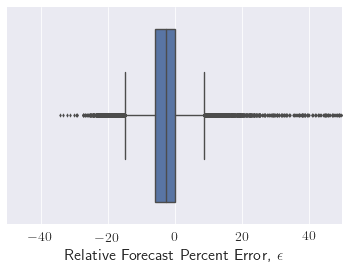

In [42]:
# forecast error for individual zones over all of 2012
db_path = 'data/processed/nyiso-2012.db'

# query reference data
sql = """
    SELECT forecast_error_p0 AS err0, forecast_error_p1 AS err1,
        forecast_error_p2 AS err2, forecast_error_p3 AS err3
    FROM forecast_error
;"""
df = query(db_path, sql)
df_plt = df.replace([np.inf, -np.inf], np.nan).dropna()
df_plt['percent-err0'] = df_plt['err0'] * 100
df_plt['percent-err1'] = df_plt['err1'] * 100
df_plt['percent-err2'] = df_plt['err2'] * 100
df_plt['logmod-percent-err0'] = np.sign(df_plt['percent-err0']) * \
                                np.log10(abs(df_plt['percent-err0']) + 1)

# boxplot (raw)
ploty = df_plt['percent-err0']
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
ax = sns.boxplot(ploty, data=df_plt, labels=['2012'], ax=ax, fliersize=3)
ax.set_xlim(-50, 50)
ax.set_xlabel(r'Relative Forecast Percent Error, $\epsilon$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# # histogram (log-mod)
# ploty = df_plt['logmod-percent-err0']
# fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
# ax = sns.distplot(ploty, ax=ax)

# save
plt.savefig('notebooks/images/nyiso-boxplot.png', dpi=150, 
            bbox_inches='tight')

## Exploratory data analysis for load z-score (grouped by hour and zone).

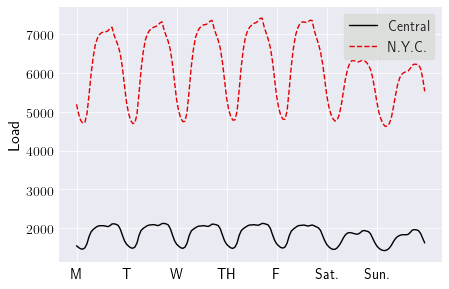

In [7]:
# hourly expected loads
# note that expected calculations do not account for seasonality

# query expected data for zone 3
sql = """
    SELECT dayofweek, hour, zone_id AS zone, mean_integrated_load AS load 
    FROM expected_load_sandy
    WHERE zone = 3
;"""
df = query(db_path, sql)
# add hours since sunday 00:00
df['timedelta'] = df['hour'] + df['dayofweek'] * 24
df = df.set_index(['timedelta', 'zone'])
df = df[['load']]
df = df.sort_index()
df_plot1 = df

# query expected data for zone 10
sql = """
    SELECT dayofweek, hour, zone_id AS zone, mean_integrated_load AS load 
    FROM expected_load_sandy
    WHERE zone = 10
;"""
df = query(db_path, sql)
# add hours since monday 00:00
df['timedelta'] = df['hour'] + df['dayofweek'] * 24
df = df.set_index(['timedelta', 'zone'])
df = df[['load']]
df = df.sort_index()
df_plot2 = df

# figure
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
lines = []
line = ax.plot(df_plot1.index.get_level_values('timedelta'), df_plot1['load'],
               color='xkcd:black', linestyle='-')
lines.append(line)
line = ax.plot(df_plot2.index.get_level_values('timedelta'), df_plot2['load'],
               color='xkcd:red', linestyle='--')
lines.append(line)

# axes
fig.tight_layout()
ax.tick_params(axis='both', colors='k', labelsize=14)
# ax.set_xlabel('Time', color='k', size=16)
ax.set_xticks(range(0, 168, 24))
ax.set_xticklabels(['M', 'T', 'W', 'TH', 'F', 'Sat.', 'Sun.'])
ax.set_ylabel('Load', color='k', size=16)
leg = ax.legend(['Central', 'N.Y.C.'],
                loc='best', fontsize=14,
                frameon=True, fancybox=True, facecolor='xkcd:light grey')

# save
# plt.savefig('notebooks/images/expectedload-timeseries.png', dpi=150, 
#             bbox_inches='tight')

In [1]:
# hourly loads for individual zones (excluding reference set from 10-22 to 
# 11-02)
db_path = 'data/processed/nyiso-2012.db'
datetime_range_ref = ('2012-01-01 05:00:00', '2013-01-01 04:59:59')
# UTC (EST, 5 hour offset)
datetime_range_excl = ('2012-10-22 04:00:00', '2012-11-03 03:59:59')
# UTC (EDT, 4 hour offset)

# tuple = (dayofweek, hour, zone)
# dayofweek (0 = Monday)
# hour (4 = 04:00, 14 = 14:00)
# zone (10 = N.Y.C., 3 = Central)
combos = [(6, 14, 10), (3, 14, 10), 
          (6, 14, 3), (3, 14, 3)]

# query reference data
sql = """
    SELECT datetimeUTC, zone_id AS zone, integrated_load AS load 
    FROM load
    WHERE
        (datetimeUTC BETWEEN "{start_datetime}" AND "{end_datetime}")
        AND (datetimeUTC NOT BETWEEN "{start_datetime_excl}" AND
            "{end_datetime_excl}")
;""".format(start_datetime=datetime_range_ref[0],
            end_datetime=datetime_range_ref[1],
            start_datetime_excl=datetime_range_excl[0],
            end_datetime_excl=datetime_range_excl[1])
df = query(db_path, sql)

# add dayofweek (0 = Monday) and hour (0-23)
df['datetimeUTC'] = pd.to_datetime(df['datetimeUTC'])
df['datetimeUTC'] = [datetime.tz_localize(tz='UTC') for datetime in
                     df['datetimeUTC']]
df['datetime'] = [datetime.tz_convert('America/New_York') for
                  datetime in df['datetimeUTC']]
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

# filter to desired dayofweek, hour, and zone combos
df_plot = pd.DataFrame()
for combo in combos:
    df_plot = df_plot.append(df[(df['dayofweek'] == combo[0]) &
                                (df['hour'] == combo[1]) &
                                (df['zone'] == combo[2])])
df_plot['timegroup'] = [str(day) + '-' + str(hour) for day, hour in 
                        zip(df_plot['dayofweek'].values, 
                            df_plot['hour'].values)]
df_plot = df_plot[['zone', 'timegroup', 'load']]
df_plot.head()

# boxplot
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
ax = sns.boxplot(x='zone', y='load', hue='timegroup', data=df_plot,
                 ax=ax)
ax.set_xlabel('Zone', fontsize=16)
ax.set_ylabel('Load', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
labels = ['Sunday, 14:00', 'Thursday, 14:00']
handles, old_labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, loc='best', fontsize=12, 
                title=None, frameon=True, fancybox=True, 
                facecolor='xkcd:light grey')
print('old labels: ' + str(old_labels))

# # save
# plt.savefig('notebooks/images/load-boxplot.png', dpi=150, 
#             bbox_inches='tight')

NameError: name 'query' is not defined

2018-07-24 10:55:33 : [min, max] zload datetime: [2012-10-22T04:00:00.000000000, 2012-11-03T03:00:00.000000000].

2018-07-24 10:55:33 : [min, max] zload: [-0.144675562928967, 0.006065874268863802].



Text(0,0.5,'Count')

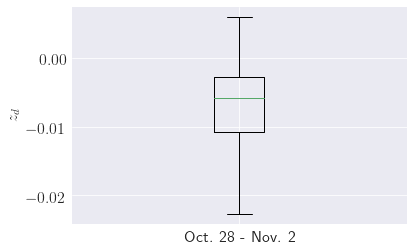

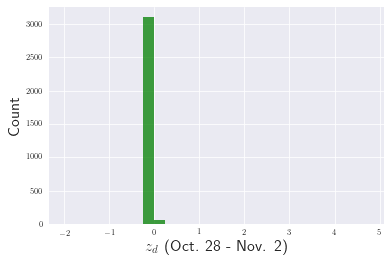

In [12]:
# hourly zone load zscores
db_path = 'data/processed/nyiso-2012.db'
sql = 'SELECT datetimeUTC, z_integrated_load AS zload FROM standard_load_sandy;'
df_load = query(db_path, sql)
df_load['datetimeUTC'] = pd.to_datetime(df_load['datetimeUTC'])
df_load['datetimeUTC'] = [datetime.tz_localize(tz='UTC') for datetime in
                          df_load['datetimeUTC']]
df_load['datetime'] = [datetime.tz_convert('America/New_York') for
                       datetime in df_load['datetimeUTC']]
output('[min, max] zload datetime: [' +
       str(np.nanmin(df_load['datetime'])) + ', ' +
       str(np.nanmax(df_load['datetime'])) + '].')
output('[min, max] zload: [' +
       str(np.nanmin(df_load['zload'])) + ', ' +
       str(np.nanmax(df_load['zload'])) + '].')

ploty = df_load['zload']

# dropoff ztrips boxplot
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
ax.boxplot(ploty, sym='', labels=['Oct. 28 - Nov. 2'])
ax.set_ylabel(r'$z_d$', fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# dropoff ztrips histogram
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=False)
# ax.hist(ploty, density=True, facecolor='g', alpha=0.75)
ax.hist(ploty, np.arange(-2, 5, 0.25), density=False, facecolor='g', alpha=0.75)
ax.set_xlabel(r'$z_d$ (Oct. 28 - Nov. 2)', fontsize=16)
ax.set_ylabel('Count', fontsize=16)